In [69]:
#import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
from pprint import pprint
import scipy.stats as stats

#file locations
#data file
csv_file_2004 ="CENSUS_and_POPULATION_FINAL_2004.csv"

csv_file_2004_2 = "../../../Resources/FOR_JINHO_2004.csv"
##NOTES###
#this dataset doesn't include Alaska,all counties were removed bc county names didn't match**
##Lousiana, also**
##It DOES include DC, and counts it as a state**





In [98]:
#read CSV files
analysis_data_2004= pd.read_csv(csv_file_2004)
analysis_data_2004

analysis_data_2004_2 = pd.read_csv(csv_file_2004_2)
#analysis_data_2004_2

In [71]:
analysis_data_2004["Avg_Turnout"] = (analysis_data_2004.Total_Votes / analysis_data_2004.County_Pop_2004)
analysis_data_2004

,Location,County,State,State_Code,Party,Candidate,Total_Votes,County_Pop_2004,Avg_Turnout
0,"Alabama, Autauga",Autauga,Alabama,AL,democrat,John Kerry,20081,48366,0.415188
1,"Alabama, Autauga",Autauga,Alabama,AL,republican,George W. Bush,20081,48366,0.415188
2,"Alabama, Baldwin",Baldwin,Alabama,AL,democrat,John Kerry,69320,156266,0.443603
3,"Alabama, Baldwin",Baldwin,Alabama,AL,republican,George W. Bush,69320,156266,0.443603
4,"Alabama, Barbour",Barbour,Alabama,AL,democrat,John Kerry,10777,28287,0.380988
...,...,...,...,...,...,...,...,...,...
5987,"Wyoming, Uinta",Uinta,Wyoming,WY,republican,George W. Bush,8081,19470,0.415049
5988,"Wyoming, Washakie",Washakie,Wyoming,WY,democrat,John Kerry,4114,7960,0.516834
5989,"Wyoming, Washakie",Washakie,Wyoming,WY,republican,George W. Bush,4114,7960,0.516834
5990,"Wyoming, Weston",Weston,Wyoming,WY,democrat,John Kerry,3392,6646,0.510382


In [72]:
analysis_data_2004['Location'].value_counts()

Iowa, Winneshiek               2
Kansas, Labette                2
Oregon, Benton                 2
Minnesota, Renville            2
South Carolina, Lancaster      2
                              ..
Texas, Hays                    2
California, San Luis Obispo    2
Illinois, Ogle                 2
Missouri, Barton               2
Indiana, Posey                 2
Name: Location, Length: 2996, dtype: int64

In [5]:
#checking an unusually high rate for Loving, Texas
texas_error_fix = analysis_data_2004[analysis_data_2004['County']=='Loving']
texas_error_fix

,Location,County,State,State_Code,Party,Candidate,Total_Votes,County_Pop_2004,Avg_Turnout
5140,"Texas, Loving",Loving,Texas,TX,democrat,John Kerry,80,55,1.454545
5141,"Texas, Loving",Loving,Texas,TX,republican,George W. Bush,80,55,1.454545


In [6]:
# 1. What is the overall average voter turnout for 2004 per (((state))), and per county
State_Avg_Turnout = round((analysis_data_2004.groupby('State')['Avg_Turnout'].mean() * 100), 2)

State_Avg_Voter_Turnout = pd.DataFrame(State_Avg_Turnout)
State_Avg_Voter_Turnout_1 = State_Avg_Voter_Turnout.reset_index()
#State_Avg_Voter_Turnout_1


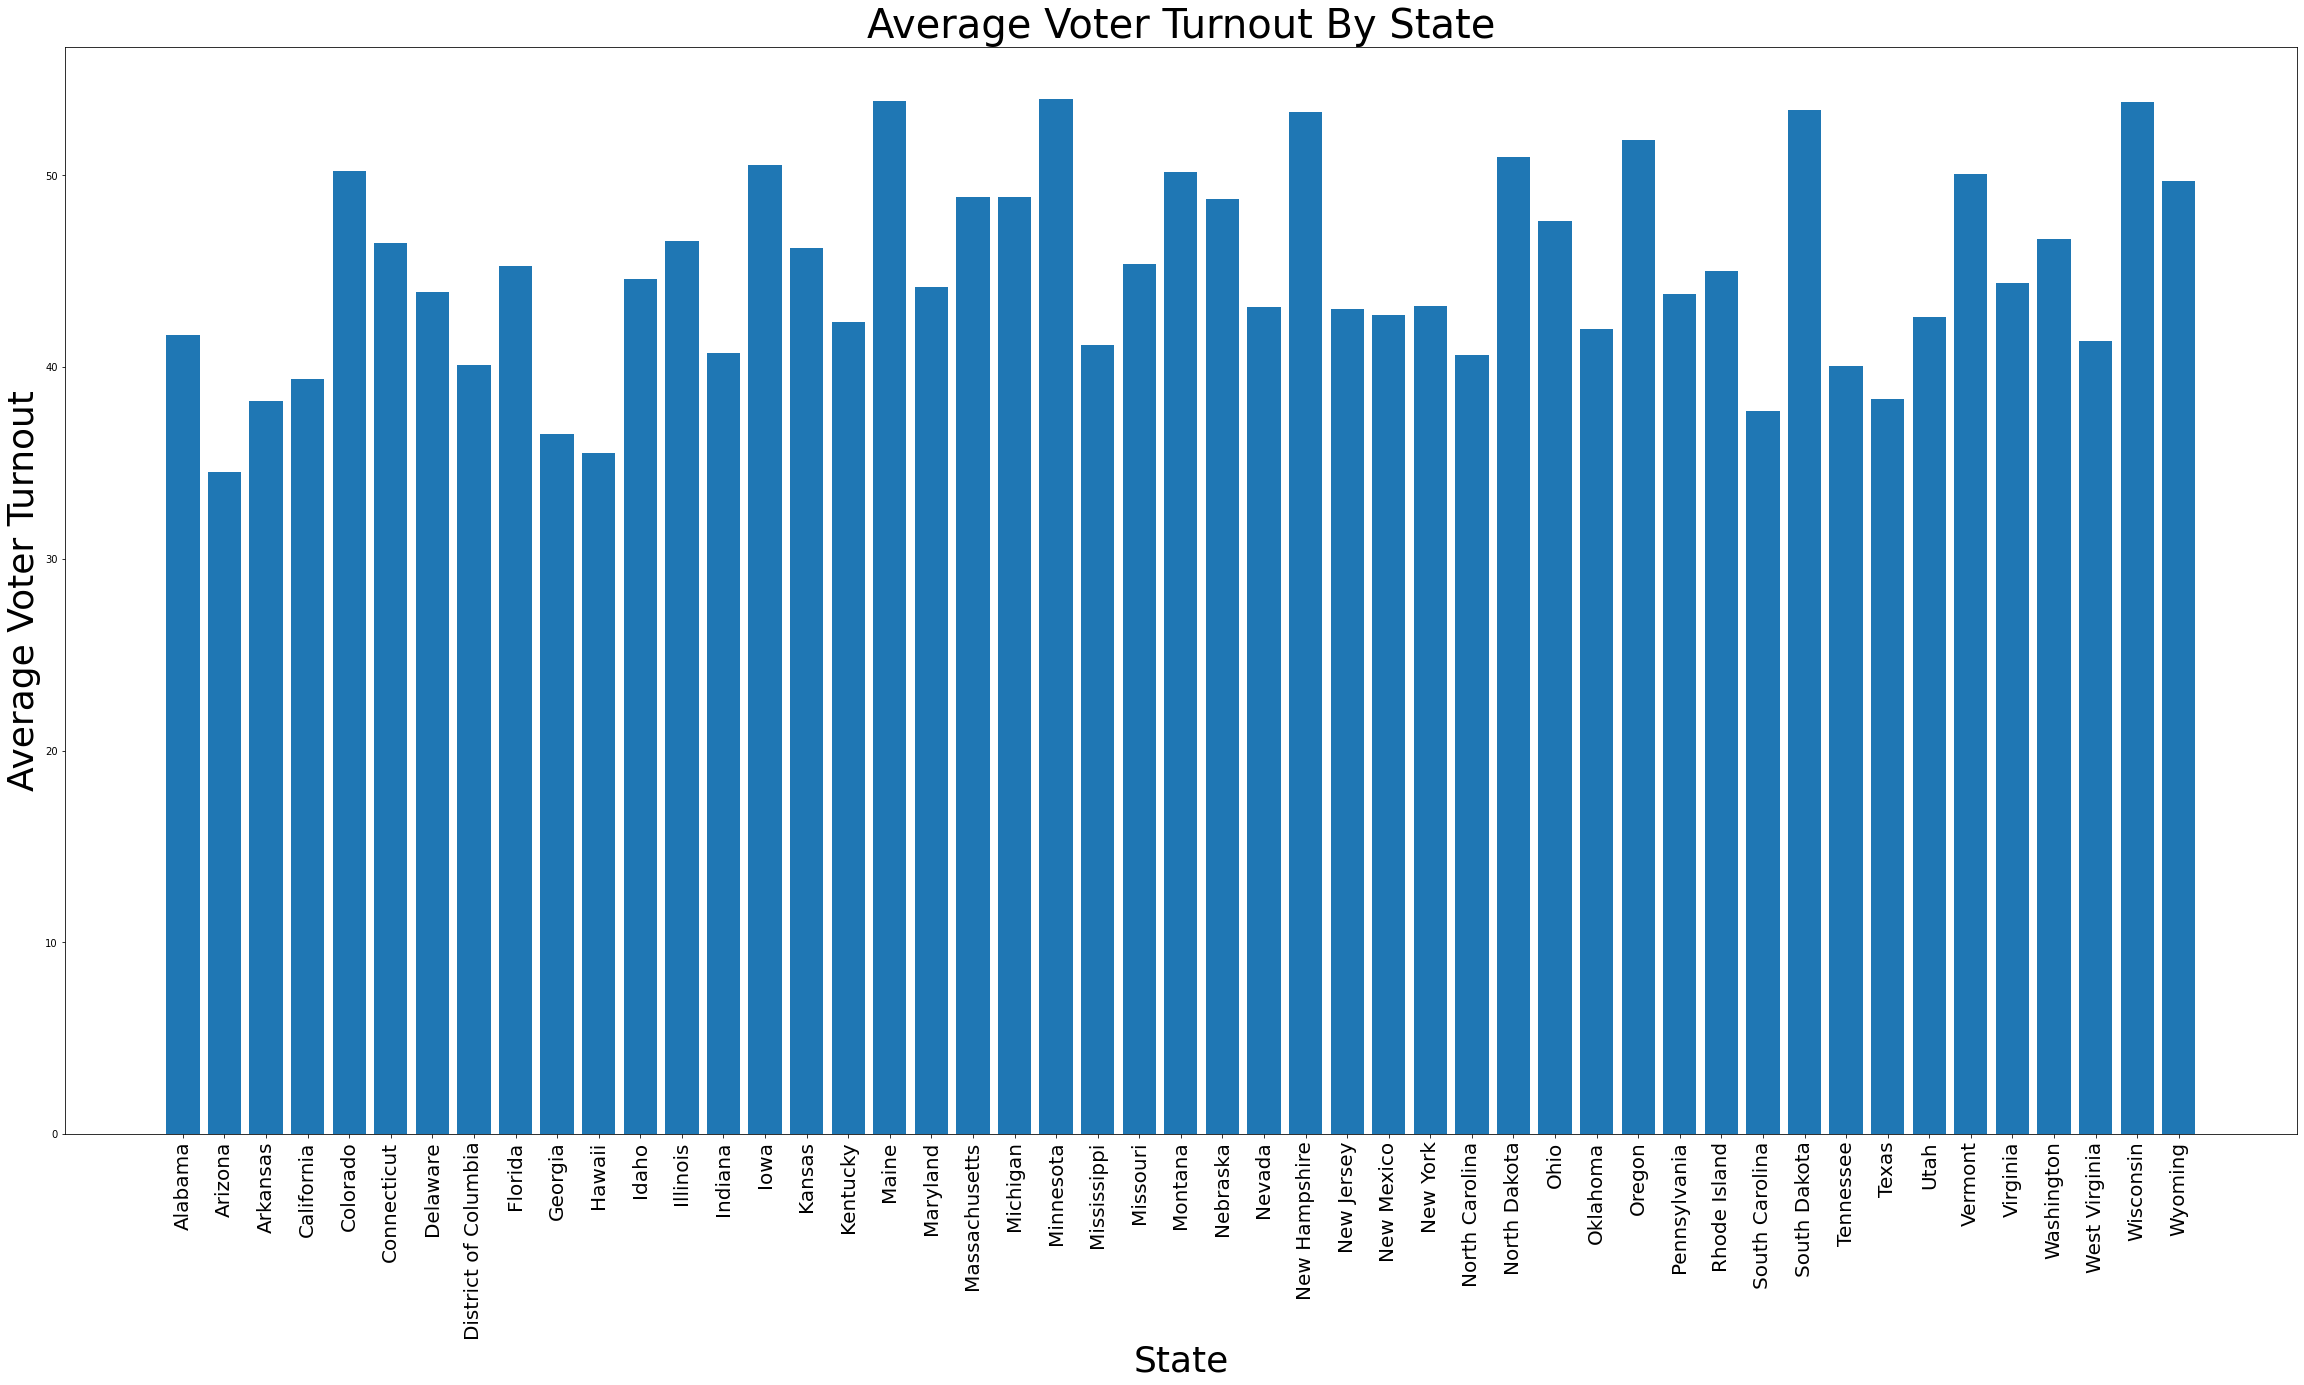

In [160]:
#Bar Graph

Avg_Turnout = State_Avg_Voter_Turnout_1["Avg_Turnout"]
State =  State_Avg_Voter_Turnout_1["State"]
plt.bar(State, Avg_Turnout)
plt.title('Average Voter Turnout By State', fontsize=40)
plt.xlabel('State', fontsize=36)
plt.ylabel('Average Voter Turnout', fontsize=36)
plt.xticks(rotation=90, fontsize=20)
#plt.rcParams["figure.figsize"] = [40, 20]
#plt.figure(figsize=(20,10))
plt.savefig("State_Avg_Voters_2004.png", dpi=25)
plt.show()

In [8]:
# 1. What is the overall average voter turnout for 2004 per state, and per (((county)))
County_Avg_Turnout = round((analysis_data_2004.groupby('Location')['Avg_Turnout'].mean() * 100), 2)
County_Avg_Turnout

County_Avg_Voter_Turnout = pd.DataFrame(County_Avg_Turnout)
County_Avg_Voter_Turnout_1 = County_Avg_Voter_Turnout.reset_index()

In [9]:
error_search =  County_Avg_Voter_Turnout_1[County_Avg_Voter_Turnout_1['Avg_Turnout']==145.45]
print(error_search)

           Location  Avg_Turnout
2570  Texas, Loving       145.45


In [162]:
Sample_County = County_Avg_Voter_Turnout_1.sample(n = 50)
#Sample_County

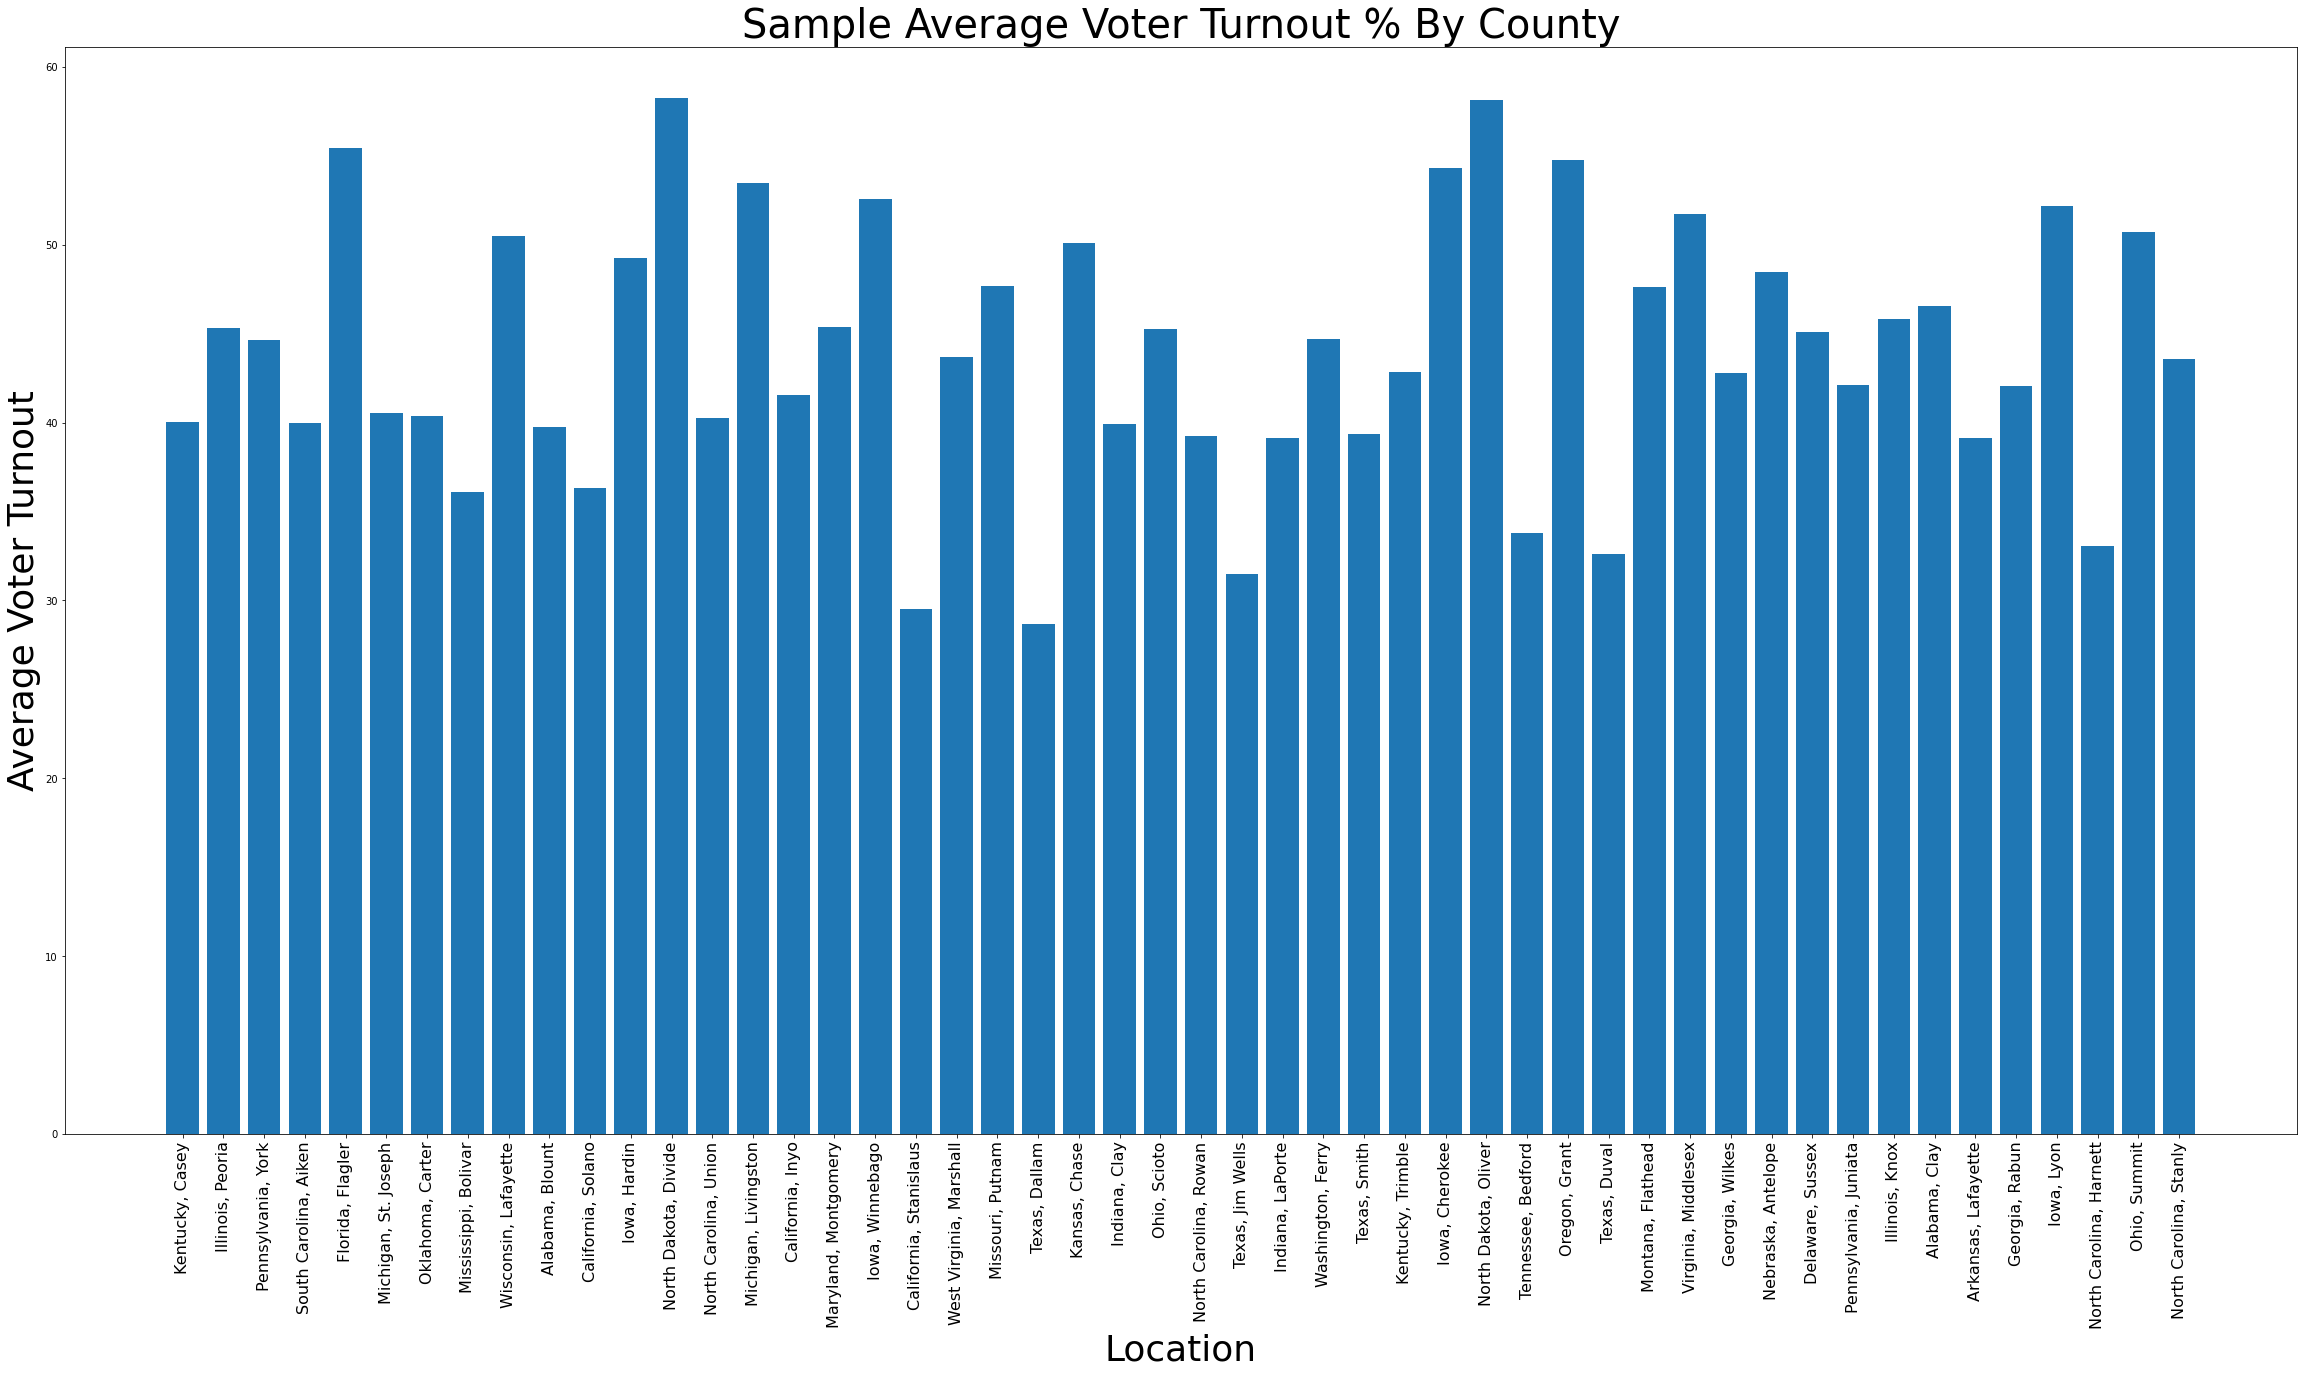

In [163]:
Avg_County_Turnout = Sample_County["Avg_Turnout"]
Location =  Sample_County["Location"]
plt.bar(Location, Avg_County_Turnout)
plt.title('Sample Average Voter Turnout % By County', fontsize=40)
plt.xlabel('Location', fontsize=36)
plt.ylabel('Average Voter Turnout', fontsize=36)
plt.xticks(rotation=90, fontsize=16)
plt.rcParams["figure.figsize"] = [100, 20]
plt.savefig("County_Avg_Voters_2004.png", dpi=25)

plt.show()

In [12]:
Pop_County = County_Avg_Voter_Turnout_1['Avg_Turnout']
Sample_County = Avg_County_Turnout

stats.ttest_1samp(Sample_County, Pop_County.mean())

Ttest_1sampResult(statistic=0.09639117446437363, pvalue=0.9236030671897721)

In [13]:
#5. Are there any outliers?
county_outliers = County_Avg_Voter_Turnout_1['Avg_Turnout']

quartiles = county_outliers.quantile([.25,.5,.75])
lowerq = round(quartiles[0.25], 2)
upperq = round(quartiles[0.75], 2)
iqr = round(upperq-lowerq, 2)

print(f"The lower quartile of county_outliers is: {lowerq}")
print(f"The upper quartile of county_outliers is: {upperq}")
print(f"The interquartile range of county_outliers is: {iqr}")
print(f"The the median of county_outliers is: {quartiles[0.5]} ")

lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



The lower quartile of county_outliers is: 39.28
The upper quartile of county_outliers is: 49.62
The interquartile range of county_outliers is: 10.34
The the median of county_outliers is: 44.175 
Values below 23.77 could be outliers.
Values above 65.13 could be outliers.


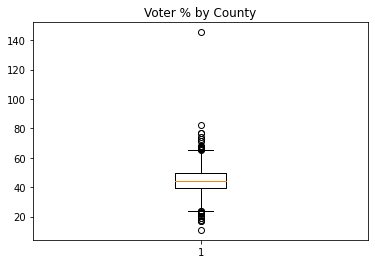

In [150]:
county_outliers = County_Avg_Voter_Turnout_1['Avg_Turnout']

##set data
data = [county_outliers]
fig1, ax1 = plt.subplots()
ax1.boxplot(data)
## add titles and labels
ax1.set_title('Voter % by County')
fig.set_size_inches(11,8)
plt.savefig("county_outliers_2004_boxplot.png")


plt.show()

In [146]:
# 2. Which States have the highest / lowest average voter turnout?


state_voter_max = State_Avg_Voter_Turnout_1['State'].max()
State_voter_max_pct = State_Avg_Voter_Turnout_1['Avg_Turnout'].max()

state_voter_min = State_Avg_Voter_Turnout_1['State'].min()
State_voter_min_pct = State_Avg_Voter_Turnout_1['Avg_Turnout'].min()


print("The State with the highest average voter turnout for 2004 is " + str(state_voter_max) +
          " with " + str(State_voter_max_pct) + "% of the population voting")
print("The State with the lowes average voter turnout for 2004 is " + str(state_voter_min) +
      " with " + str(State_voter_min_pct) + "% of the population voting")




The State with the highest average voter turnout for 2004 is Wyoming with 54.0% of the population voting
The State with the lowes average voter turnout for 2004 is Alabama with 34.53% of the population voting


In [143]:
# 3. voter turnout vs population


#drop location column to leave only states
analysis_data_2004_3 = analysis_data_2004_2.drop(columns=['Location'])
#groupby state
analysis_data_2004_4 = analysis_data_2004_3.groupby('State_Code').sum()

analysis_data_2004_4["state_pop"] = (analysis_data_2004.groupby('State_Code')['County_Pop_2004'].sum() / 2)


#get percent of repub votes
analysis_data_2004_4["Pct_Repub_PCT_2004"] = (round(analysis_data_2004_4['2004_republican_votes'] / analysis_data_2004_4["state_pop"], 2))
#get per cent of dem votes
analysis_data_2004_4["Pct_Dem_PCT_2004"] = (round(analysis_data_2004_4['2004_democrat_votes'] / analysis_data_2004_4["state_pop"], 2))
#get total votes percent (1)
analysis_data_2004_4["Total_Votes_PCT_2004"] = analysis_data_2004_4['Total_Votes_2004'] / analysis_data_2004_4["state_pop"]
#get total votes percent (1)
analysis_data_2004_4["Prct_Not_Voting_2004"] = (round(((analysis_data_2004_4["state_pop"] / analysis_data_2004_4["state_pop"]) - analysis_data_2004_4["Total_Votes_PCT_2004"]), 2)) 


analysis_data_2004_5 = analysis_data_2004_4[['Pct_Repub_PCT_2004', 'Pct_Dem_PCT_2004', "Prct_Not_Voting_2004"]]
analysis_data_2004_5.head()


,Pct_Repub_PCT_2004,Pct_Dem_PCT_2004,Prct_Not_Voting_2004
State_Code,,,
AL,0.26,0.15,0.58
AR,0.21,0.17,0.62
AZ,0.20,0.16,0.64
CA,0.15,0.19,0.65
CO,0.24,0.22,0.53


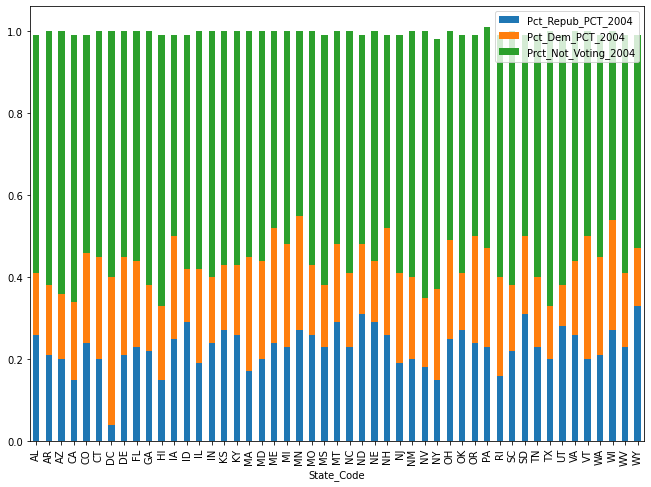

In [142]:
# 3. How Many People didn't Vote?
#Stacked Bar Graph

analysis_data_2004_3
axis = analysis_data_2004_5[['Pct_Repub_PCT_2004', 'Pct_Dem_PCT_2004', "Prct_Not_Voting_2004"]].plot(kind="bar", stacked=True, figsize=(30, 60))
fig = axis.get_figure()
fig.set_size_inches(11,8)
fig.savefig("voter_turnout_vs_population.png", figsize=(8, 6))


In [236]:
#Sample_County

In [229]:
#analysis_data_2004.head()

sample_county_2 = County_Avg_Voter_Turnout_1.sample(n = 20)


sample_county_pop = sample_county_2.merge(analysis_data_2004[['County_Pop_2004', 'Location']], on="Location", how='left')

sample_county_pop_2 = sample_county_pop.drop_duplicates()



In [246]:
sample_county_pop_2['Total'] = 100
sample_county_pop_2

<ipython-input-246-f330384f93bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_county_pop_2['Total'] = 100


,Location,Avg_Turnout,County_Pop_2004,Total
0,"Tennessee, Hamilton",43.39,315396,100
2,"Illinois, Woodford",51.49,36514,100
4,"Alabama, Marengo",47.40,21777,100
6,"Virginia, Augusta",43.11,68899,100
8,"Wisconsin, St. Croix",56.54,73988,100
10,"Illinois, Pope",55.06,4424,100
12,"Texas, Henderson",37.08,77807,100
14,"Mississippi, Smith",44.07,16126,100
16,"Iowa, Lee",48.81,36587,100
18,"Utah, Wayne",54.29,2505,100


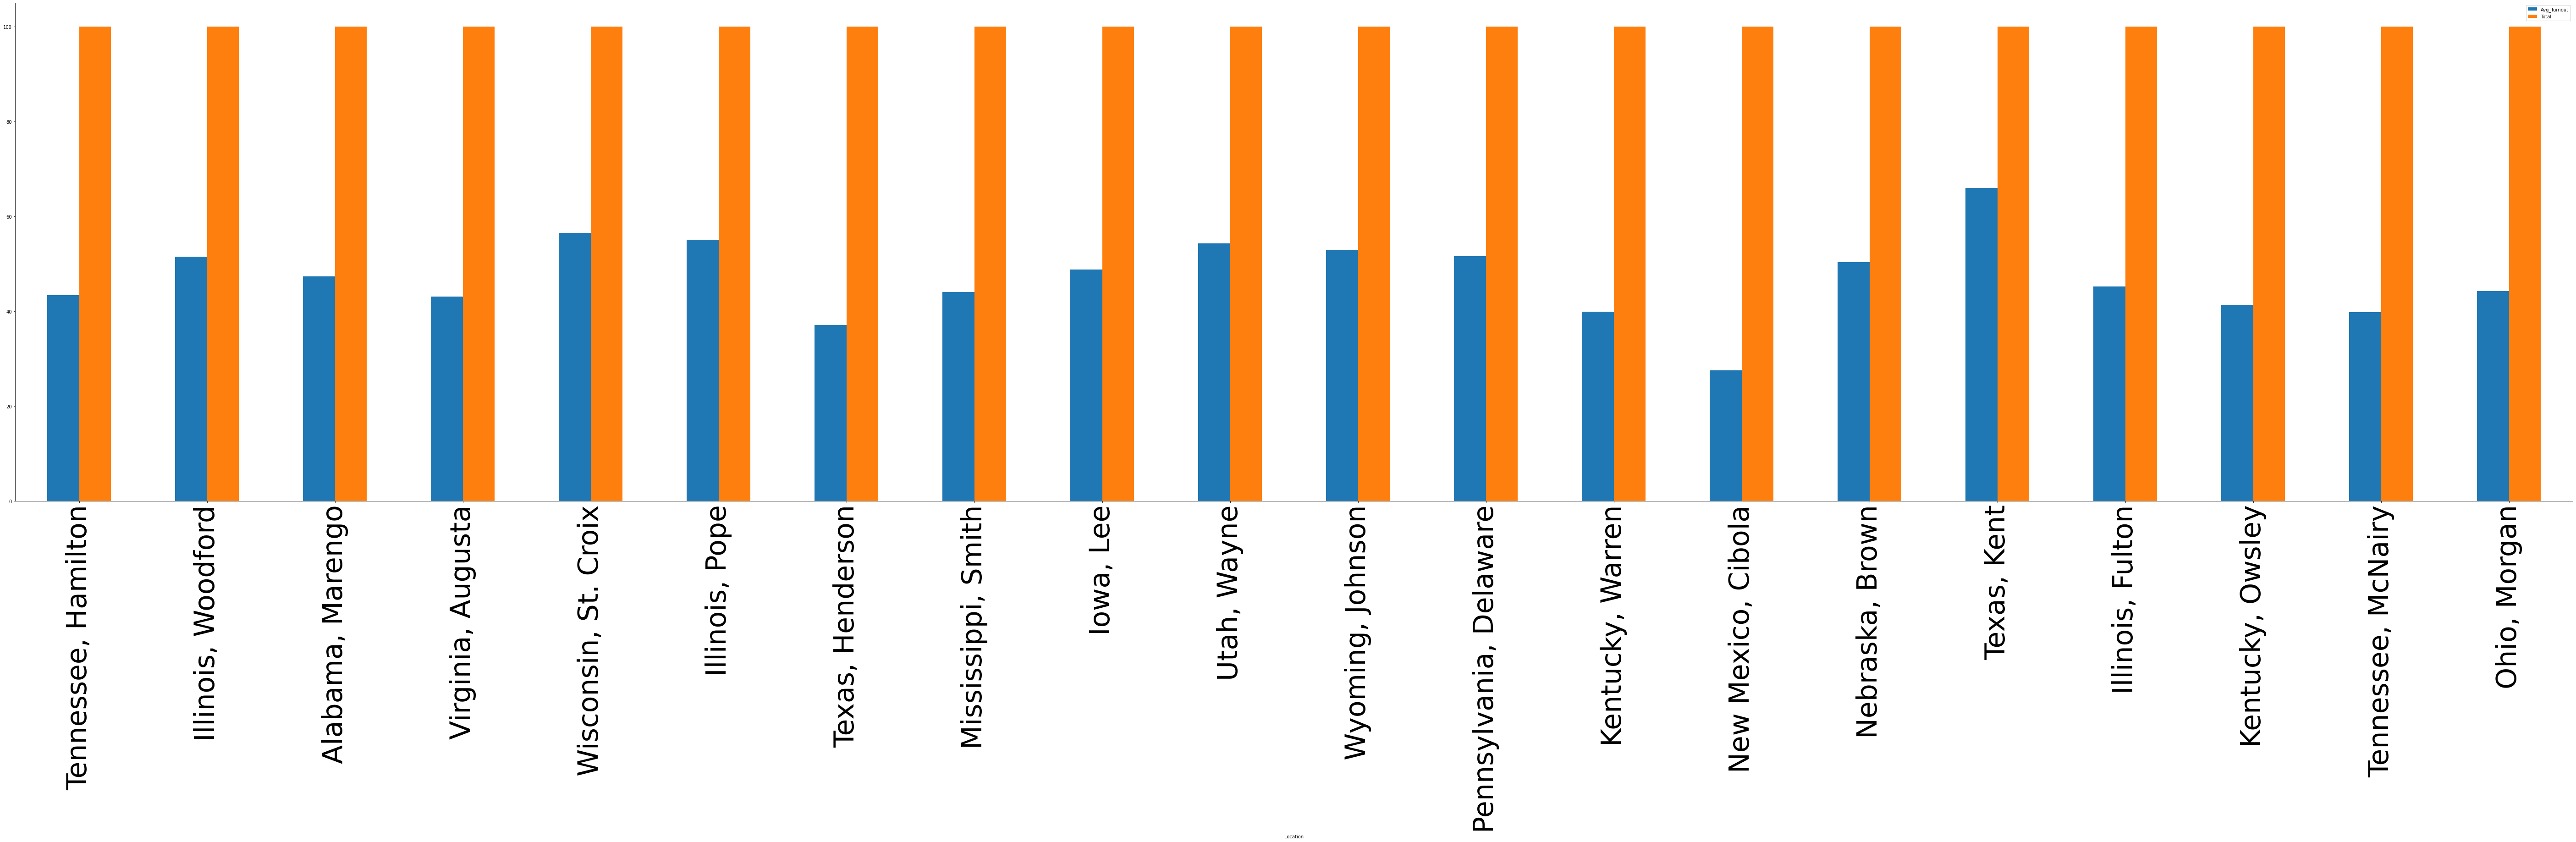

In [264]:
#4. What is the avg population of the county compared to the voters on election day

#arnold

sample_county_pop_2.plot(x="Location", y=["Avg_Turnout", "Total"], kind="bar")
plt.xticks(rotation=90, fontsize=60)
plt.savefig("Avg_Voters_vs_Pop_Sample_County_2004.png",  dpi=25)

plt.show()


In [244]:
analysis_data_2004_5_1 = analysis_data_2004_5.reset_index()

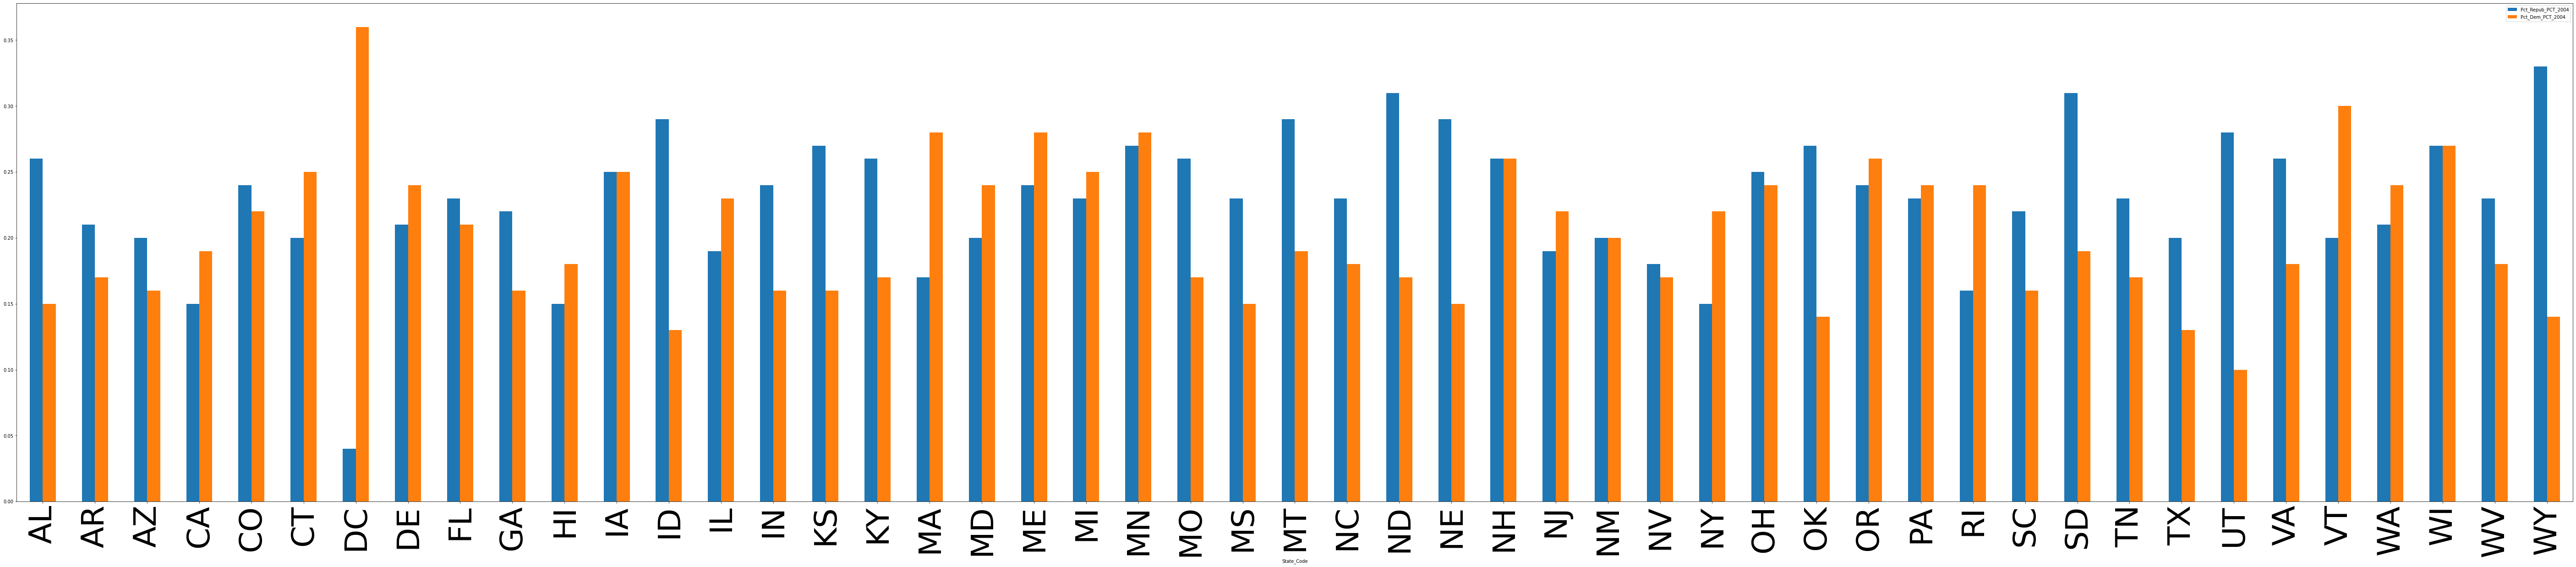

In [266]:
#5. What is the voter turnout based on political party per state, county


analysis_data_2004_5_1.plot(x="State_Code", y=["Pct_Repub_PCT_2004", "Pct_Dem_PCT_2004"], kind="bar")
plt.xticks(rotation=90, fontsize=68)
plt.savefig("Voters_Political_Parties_2004.png")

plt.show()


